In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.metrics import mean_squared_error
import math
from sklearn.linear_model import LinearRegression

#Data=pd.read_csv('/Users/Juyoung/Desktop/BigdataProgramming-main/프로젝트/data/bigpro_test.csv',encoding='utf-8')
Data=pd.read_csv('/Users/juyoung/Desktop/빅데이터프로그래밍/프로젝트/data/bigpro_test.csv',encoding='utf-8')
Data=Data[Data['OECD']=='v']
Data=Data.dropna(axis=0)
Data=Data.reset_index()
Data

,index,Country,OECD,Real_house_price,Percentage_change_PIR,Safety,Working_age_popul,Elderly_popul,Working_hours,Unemploy_rate,Employ_rate,Gini_coff,2018_GDP,2018_GDP_Rank,Happiness_score,Happiness_score_rank,Sub
0,0,Australia,v,102.2,8.3,63.0,65.5,15.7,1712.0,6.498750,74.275,0.325,57354.964046,10,7.272,10,0
1,1,Austria,v,117.9,5.3,81.0,66.8,18.8,1501.0,5.333500,73.575,0.280,51478.285262,13,7.139,12,-1
2,2,Belgium,v,106.4,3.6,70.0,64.2,18.8,1583.0,5.550000,65.300,0.258,47583.074941,17,6.927,16,-1
3,3,Canada,v,123.4,12.1,82.0,66.7,17.2,1670.0,9.600000,74.150,0.303,46313.171371,18,7.328,7,-11
4,4,Chile,v,111.3,6.7,48.0,68.7,11.5,1914.0,10.765000,64.125,0.460,15924.794239,45,6.476,25,-20
5,5,Czech Republic,v,131.0,11.7,72.0,64.8,19.4,1788.0,2.558250,75.150,0.249,23415.843627,35,6.711,21,-14
6,6,Denmark,v,114.3,4.5,84.0,64.0,19.5,1380.0,5.641750,75.050,0.264,61598.536704,9,7.555,3,-6
7,7,Estonia,v,112.4,5.5,69.0,64.0,19.7,1711.0,6.766500,75.275,0.305,23170.707378,37,5.739,63,26
8,8,Finland,v,101.1,1.6,85.0,62.3,21.6,1540.0,7.783250,72.975,0.269,50030.877311,14,7.632,1,-13
9,9,France,v,106.8,3.0,71.0,62.1,19.8,1505.0,8.050000,65.550,0.301,41631.090739,23,6.489,23,0


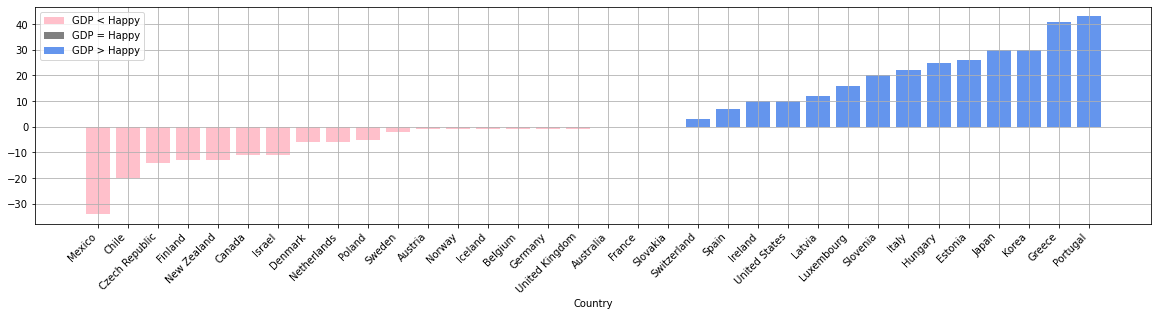

In [14]:
unhappy_data=Data[Data['Sub']>0]
happy_data=Data[Data['Sub']<0]
same_data=Data[Data['Sub']==0]
unhappy_data=unhappy_data.sort_values(by='Sub')
happy_data=happy_data.sort_values(by='Sub')
same_data=same_data.sort_values(by='Sub')

plt.figure(figsize=(20,4))
plt.bar(happy_data['Country'], happy_data['Sub'],color='pink',label='GDP < Happy')
plt.bar(same_data['Country'],same_data['Sub'],color='grey', label='GDP = Happy')
plt.bar(unhappy_data['Country'], unhappy_data['Sub'],color='cornflowerblue', label='GDP > Happy')
plt.grid(True)
plt.legend()
plt.xlabel('Country')
plt.xticks(rotation=45, ha='right')
plt.show()

In [15]:
unhappy_con=unhappy_data['Country']
happy_con=happy_data['Country']
same_con=same_data['Country']
#print("unhappy ",unhappy_con)
#print("happy ",happy_con)
print('GDP>Happy = ',len(unhappy_con),'\nGDP=Happy = ',len(same_con),'\nGDP<Happy = ',len(happy_con))

GDP>Happy =  14 
GDP=Happy =  3 
GDP<Happy =  17


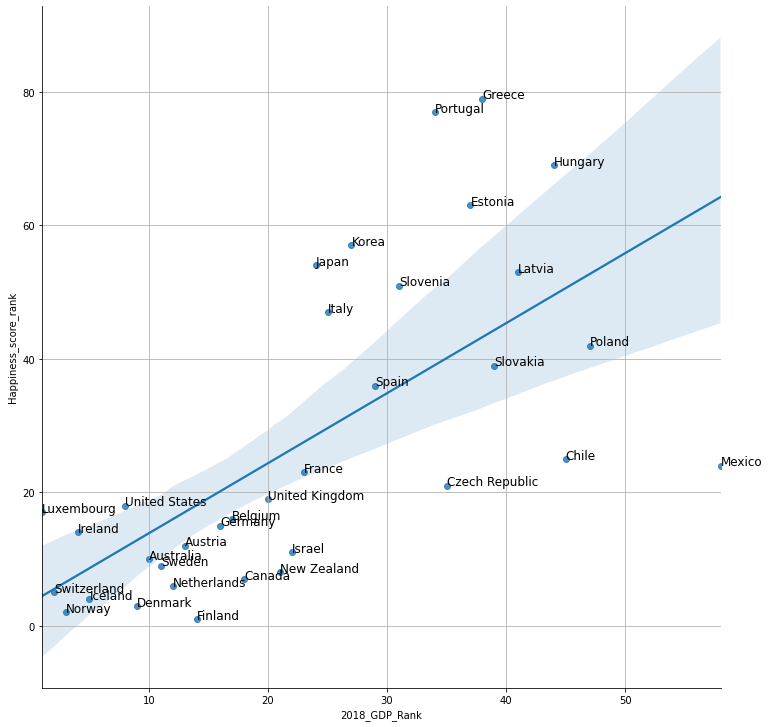

In [28]:
scatter_data=Data.sort_values(by="2018_GDP_Rank")
scatter_data=scatter_data.reset_index()

sns.lmplot(x="2018_GDP_Rank", y="Happiness_score_rank", height=10,data=scatter_data)

for i, txt in enumerate(scatter_data['Country']):
    plt.gca().annotate(txt, (scatter_data['2018_GDP_Rank'][i], scatter_data['Happiness_score_rank'][i]),size=12)

plt.grid(True)
plt.show()

In [40]:
def Make_data(dataframe, data):
    dataframe=dataframe.sort_values(by=data)
    dataframe=dataframe.reset_index()
    return dataframe

def Make_plt(dataframe,data,c):
    plt.plot(dataframe[data],dataframe['Happiness_score'],'o',color=c,label=dataframe)
    
def Make_two_plt(main_frame,happy_frame,unhappy_frame,same_frame,data):
    for i,txt in enumerate(main_frame['Country']):
        for j in (happy_frame['Country']):
            if j==txt:
                plt.plot(main_frame[data][i],main_frame['Happiness_score'][i],'o',color='tomato', markersize=10)
        for j in (unhappy_frame['Country']):
            if j==txt:
                plt.plot(main_frame[data][i],main_frame['Happiness_score'][i],'o',color='cornflowerblue', markersize=8)
        for j in (same_frame['Country']):
            if j==txt:
                plt.plot(main_frame[data][i],main_frame['Happiness_score'][i],'o',color='grey', markersize=8)
        

def Make_linear(dataframe,data):
    linear=LinearRegression()
    linear.fit(dataframe[data].values.reshape(-1,1),dataframe['Happiness_score'])
    pred=linear.predict(dataframe[data].values.reshape(-1,1))
    plt.plot(dataframe[data],linear.predict(dataframe[data].values.reshape(-1,1)),color='red')

    print('Score : ', linear.score(dataframe[data].values.reshape(-1,1),dataframe['Happiness_score']))
    print('RMSE : ', mean_squared_error(pred, dataframe['Happiness_score'])**0.5)
    print('MSE : ', mean_squared_error(pred, dataframe['Happiness_score']),'\n')
    
    print("기울기 : ",linear.coef_)
    print("절편 : ",linear.intercept_,"\n\n")
    
def Make_name(dataframe,data):
    for i, txt in enumerate(dataframe['Country']):
        plt.annotate(txt,(dataframe[data][i],dataframe['Happiness_score'][i]),size=15)
        
def Pearson_corr(dataframe,data):
    body=pd.DataFrame({'Happiness_score':dataframe['Happiness_score'],data:dataframe[data]})

    pearson_corr=body.corr(method='pearson')
    print('pearson_corr : {}\n\n'.format(pearson_corr))

# Change rate PIR

Score :  0.1163025831962694
RMSE :  0.6404230514574272
MSE :  0.41014168483804236 

기울기 :  [0.0599287]
절편 :  6.316480755505827 




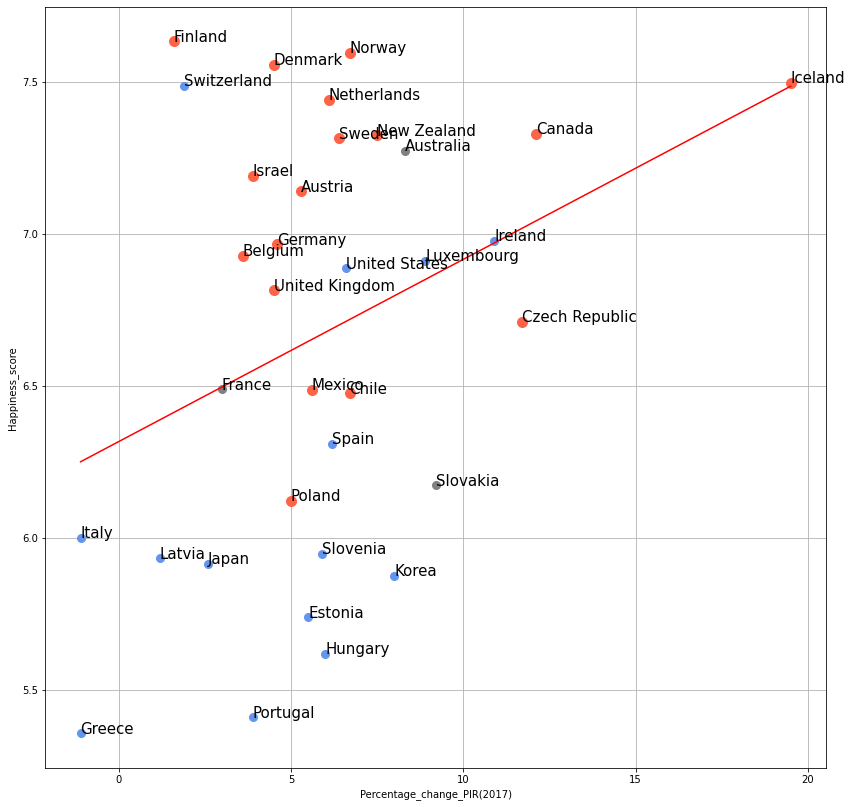

total_PIR_corr : SpearmanrResult(correlation=0.24973255025764873, pvalue=0.1543321663724058)

happy_PIR_corr : SpearmanrResult(correlation=0.04417181239175657, pvalue=0.8663207321493397)

unhappy_PIR_corr : SpearmanrResult(correlation=0.37183740872507126, pvalue=0.19049443095596738)


In [41]:
plt.figure(figsize=(14,14))

data='Percentage_change_PIR'

PIR_data=Make_data(Data,data)
Make_name(PIR_data,data)
Make_two_plt(PIR_data,happy_data,unhappy_data,same_data,data)
Make_linear(PIR_data,data)

plt.xlabel('Percentage_change_PIR(2017)')
plt.ylabel('Happiness_score')
plt.grid(True)
plt.show()

total_PIR_body=pd.DataFrame({'Happiness_score':PIR_data['Happiness_score'],'PIR':PIR_data[data]})
total_PIR_corr=stats.spearmanr(total_PIR_body.PIR,total_PIR_body.Happiness_score)
print('total_PIR_corr : {}'.format(total_PIR_corr))

happy_PIR_body=pd.DataFrame({'Happiness_score':happy_data['Happiness_score'],'PIR':happy_data[data]})
happy_PIR_corr=stats.spearmanr(happy_PIR_body.PIR,happy_PIR_body.Happiness_score)
print('\nhappy_PIR_corr : {}'.format(happy_PIR_corr))

unhappy_PIR_body=pd.DataFrame({'Happiness_score':unhappy_data['Happiness_score'],'PIR':unhappy_data[data]})
unhappy_PIR_corr=stats.spearmanr(unhappy_PIR_body.PIR,unhappy_PIR_body.Happiness_score)
print('\nunhappy_PIR_corr : {}'.format(unhappy_PIR_corr))

# House price

Score :  0.01390446041491289
RMSE :  0.6765106844606887
MSE :  0.4576667061894696 

기울기 :  [-0.0068376]
절편 :  7.469830072570308 




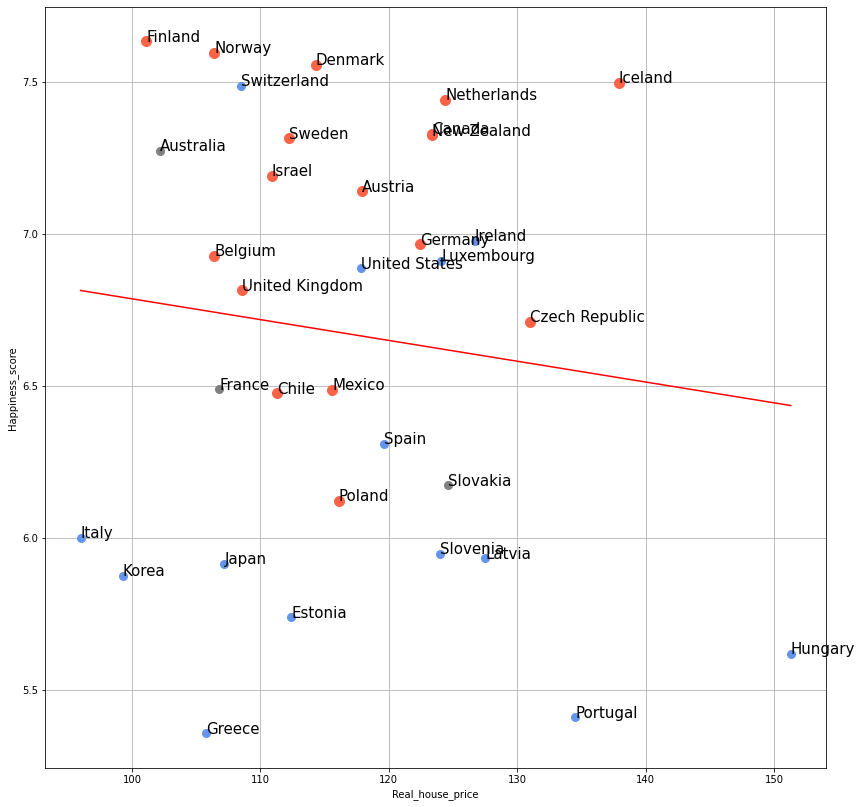

total_house_corr : SpearmanrResult(correlation=-0.0744193162723216, pvalue=0.6757385493354546)

happy_house_corr : SpearmanrResult(correlation=-0.05276077591237591, pvalue=0.8406145356254658)

unhappy_house_corr : SpearmanrResult(correlation=-0.015384615384615385, pvalue=0.9583697893719862)


In [7]:
plt.figure(figsize=(14,14))

data='Real_house_price'

house_data=Make_data(Data,data)
Make_name(house_data,data)
Make_two_plt(house_data,happy_data,unhappy_data,same_data,data)
Make_linear(house_data,data)

plt.xlabel('Real_house_price')
plt.ylabel('Happiness_score')
plt.grid(True)
plt.show()

total_house_body=pd.DataFrame({'Happiness_score':house_data['Happiness_score'],'house':house_data[data]})
total_house_corr=stats.spearmanr(total_house_body.house,total_house_body.Happiness_score)
print('total_house_corr : {}'.format(total_house_corr))

happy_house_body=pd.DataFrame({'Happiness_score':happy_data['Happiness_score'],'house':happy_data[data]})
happy_house_corr=stats.spearmanr(happy_house_body.house,happy_house_body.Happiness_score)
print('\nhappy_house_corr : {}'.format(happy_house_corr))

unhappy_house_body=pd.DataFrame({'Happiness_score':unhappy_data['Happiness_score'],'house':unhappy_data[data]})
unhappy_house_corr=stats.spearmanr(unhappy_house_body.house,unhappy_house_body.Happiness_score)
print('\nunhappy_house_corr : {}'.format(unhappy_house_corr))

# Safety

Score :  0.2750299859989841
RMSE :  0.5800630271869252
MSE :  0.33647311550925946 

기울기 :  [0.03257103]
절편 :  4.326961601230831 




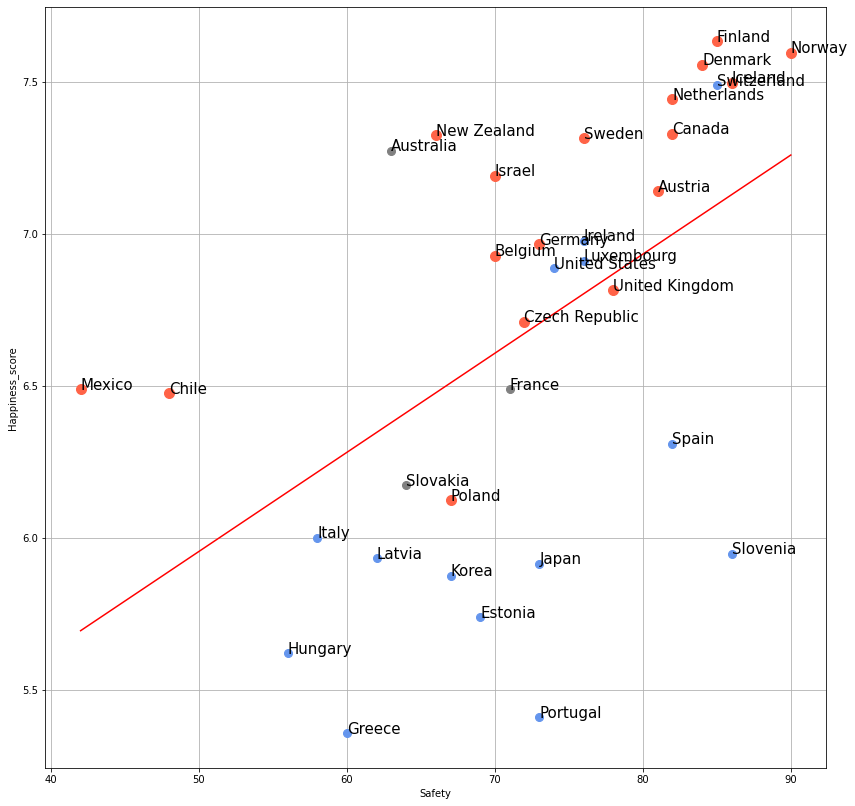

total_safety_corr : SpearmanrResult(correlation=0.6050180452336893, pvalue=0.00015037440982376978)

happy_safety_corr : SpearmanrResult(correlation=0.8220865084021362, pvalue=5.140514476142231e-05)

unhappy_safety_corr : SpearmanrResult(correlation=0.6563892574813541, pvalue=0.010783276452558773)


In [8]:
plt.figure(figsize=(14,14))

data='Safety'

safety_data=Make_data(Data,data)
Make_name(safety_data,data)
Make_two_plt(safety_data,happy_data,unhappy_data,same_data,data)
Make_linear(safety_data,data)

plt.xlabel('Safety')
plt.ylabel('Happiness_score')
plt.grid(True)
plt.show()

total_safety_body=pd.DataFrame({'Happiness_score':safety_data['Happiness_score'],'Safety':safety_data[data]})
total_safety_corr=stats.spearmanr(total_safety_body.Safety,total_safety_body.Happiness_score)
print('total_safety_corr : {}'.format(total_safety_corr))

happy_safety_body=pd.DataFrame({'Happiness_score':happy_data['Happiness_score'],'Safety':happy_data[data]})
happy_safety_corr=stats.spearmanr(happy_safety_body.Safety,happy_safety_body.Happiness_score)
print('\nhappy_safety_corr : {}'.format(happy_safety_corr))

unhappy_safety_body=pd.DataFrame({'Happiness_score':unhappy_data['Happiness_score'],'Safety':unhappy_data[data]})
unhappy_safety_corr=stats.spearmanr(unhappy_safety_body.Safety,unhappy_safety_body.Happiness_score)
print('\nunhappy_safety_corr : {}'.format(unhappy_safety_corr))

# Elder/Working

Score :  0.06165156764379398
RMSE :  0.6599290239371257
MSE :  0.4355063166346074 

기울기 :  [-2.61359658]
절편 :  7.392349541368315 




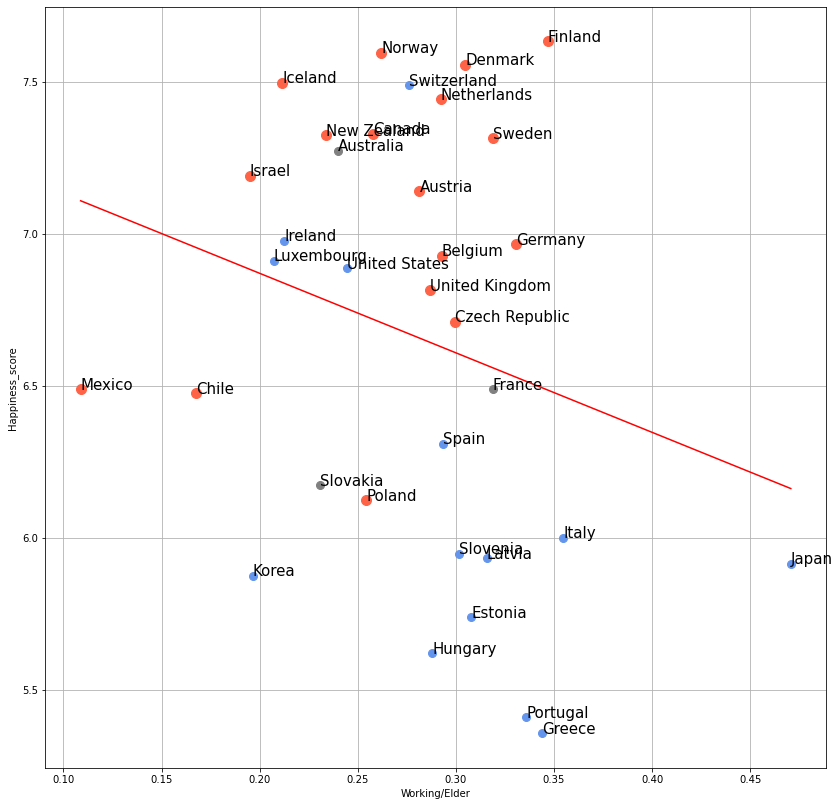

total_working/elder_corr : SpearmanrResult(correlation=-0.22872421695951106, pvalue=0.19321668173397)

happy_working/elder_corr : SpearmanrResult(correlation=0.33333333333333337, pvalue=0.191057627345904)

unhappy_working/elder_corr : SpearmanrResult(correlation=-0.4945054945054946, pvalue=0.07224967403413257)


In [9]:
plt.figure(figsize=(14,14))

Data['working/elder']=Data['Elderly_popul']/Data['Working_age_popul']
happy_data['working/elder']=happy_data['Elderly_popul']/happy_data['Working_age_popul']
unhappy_data['working/elder']=unhappy_data['Elderly_popul']/unhappy_data['Working_age_popul']

data='working/elder'

we_data=Make_data(Data,data)
Make_name(we_data,data)
Make_two_plt(we_data,happy_data,unhappy_data,same_data,data)
Make_linear(we_data,data)

plt.xlabel('Working/Elder')
plt.ylabel('Happiness_score')
plt.grid(True)
plt.show()

total_we_body=pd.DataFrame({'Happiness_score':we_data['Happiness_score'],'we':we_data[data]})
total_we_corr=stats.spearmanr(total_we_body.we,total_we_body.Happiness_score)
print('total_working/elder_corr : {}'.format(total_we_corr))

happy_we_body=pd.DataFrame({'Happiness_score':happy_data['Happiness_score'],'we':happy_data[data]})
happy_we_corr=stats.spearmanr(happy_we_body.we,happy_we_body.Happiness_score)
print('\nhappy_working/elder_corr : {}'.format(happy_we_corr))

unhappy_we_body=pd.DataFrame({'Happiness_score':unhappy_data['Happiness_score'],'we':unhappy_data[data]})
unhappy_we_corr=stats.spearmanr(unhappy_we_body.we,unhappy_we_body.Happiness_score)
print('\nunhappy_working/elder_corr : {}'.format(unhappy_we_corr))

# Working_hours

Score :  0.2541061021676756
RMSE :  0.588374293638207
MSE :  0.3461843094142591 

기울기 :  [-0.00189796]
절편 :  9.827487230764884 




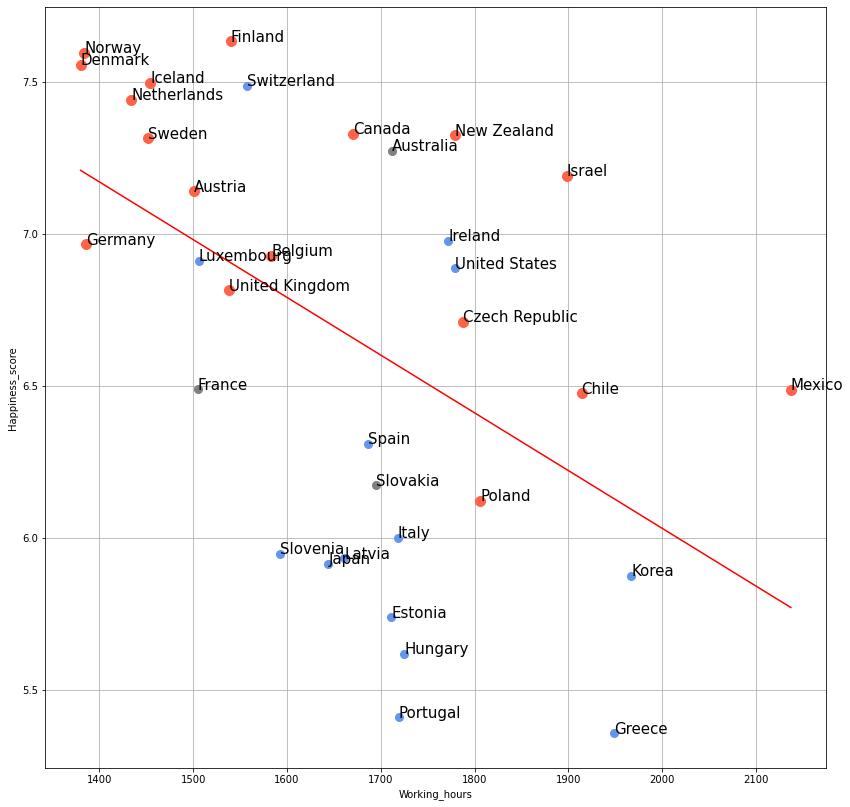

total_working/elder_corr : SpearmanrResult(correlation=-0.5473298205292999, pvalue=0.000808073409247039)

happy_Working_hours_corr : SpearmanrResult(correlation=-0.6519607843137255, pvalue=0.004568346266924807)

unhappy_Working_hours_corr : SpearmanrResult(correlation=-0.432967032967033, pvalue=0.12201000596848025)


In [10]:
plt.figure(figsize=(14,14))

data='Working_hours'

hours_data=Make_data(Data,data)
Make_name(hours_data,data)
Make_two_plt(hours_data,happy_data,unhappy_data,same_data,data)
Make_linear(hours_data,data)

plt.xlabel('Working_hours')
plt.ylabel('Happiness_score')
plt.grid(True)
plt.show()

total_hours_body=pd.DataFrame({'Happiness_score':hours_data['Happiness_score'],'hours':hours_data[data]})
total_hours_corr=stats.spearmanr(total_hours_body.hours,total_hours_body.Happiness_score)
print('total_working/elder_corr : {}'.format(total_hours_corr))

happy_hours_body=pd.DataFrame({'Happiness_score':happy_data['Happiness_score'],'hours':happy_data[data]})
happy_hours_corr=stats.spearmanr(happy_hours_body.hours,happy_hours_body.Happiness_score)
print('\nhappy_Working_hours_corr : {}'.format(happy_hours_corr))

unhappy_hours_body=pd.DataFrame({'Happiness_score':unhappy_data['Happiness_score'],'hours':unhappy_data[data]})
unhappy_hours_corr=stats.spearmanr(unhappy_hours_body.hours,unhappy_hours_body.Happiness_score)
print('\nunhappy_Working_hours_corr : {}'.format(unhappy_hours_corr))

# Employ_rate

Score :  0.2991897300251881
RMSE :  0.5703157844782548
MSE :  0.3252600940250472 

기울기 :  [0.06153245]
절편 :  2.2810487727069564 




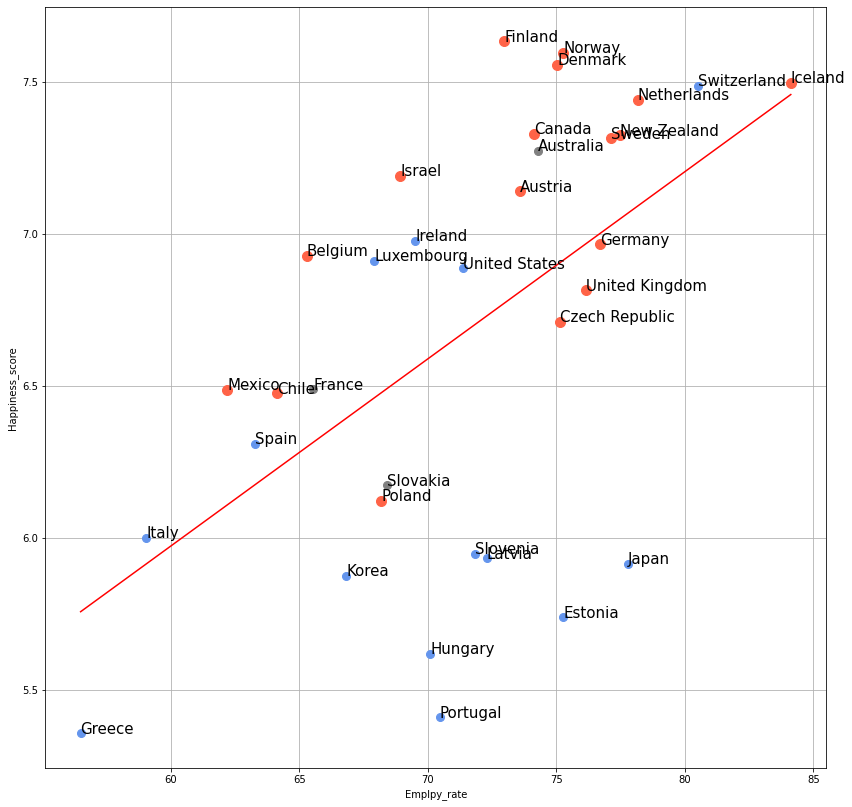

total_employ_corr : SpearmanrResult(correlation=0.5167698082161062, pvalue=0.0017530689711709052)

happy_employ_corr : SpearmanrResult(correlation=0.5000000000000001, pvalue=0.040968955955836106)

unhappy_employ_corr : SpearmanrResult(correlation=0.15164835164835166, pvalue=0.6047905984521367)


In [11]:
plt.figure(figsize=(14,14))

data='Employ_rate'

employ_data=Make_data(Data,data)
Make_name(employ_data,data)
Make_two_plt(employ_data,happy_data,unhappy_data,same_data,data)
Make_linear(employ_data,data)

plt.xlabel('Emplpy_rate')
plt.ylabel('Happiness_score')
plt.grid(True)
plt.show()

total_employ_body=pd.DataFrame({'Happiness_score':employ_data['Happiness_score'],'employ':employ_data[data]})
total_employ_corr=stats.spearmanr(total_employ_body.employ,total_employ_body.Happiness_score)
print('total_employ_corr : {}'.format(total_employ_corr))

happy_employ_body=pd.DataFrame({'Happiness_score':happy_data['Happiness_score'],'employ':happy_data[data]})
happy_employ_corr=stats.spearmanr(happy_employ_body.employ,happy_employ_body.Happiness_score)
print('\nhappy_employ_corr : {}'.format(happy_employ_corr))

unhappy_employ_body=pd.DataFrame({'Happiness_score':unhappy_data['Happiness_score'],'employ':unhappy_data[data]})
unhappy_employ_corr=stats.spearmanr(unhappy_employ_body.employ,unhappy_employ_body.Happiness_score)
print('\nunhappy_employ_corr : {}'.format(unhappy_employ_corr))

# Gini_coff

Score :  0.03522420541547766
RMSE :  0.6691575189600635
MSE :  0.4477717851807877 

기울기 :  [-2.45475743]
절편 :  7.434619407313358 




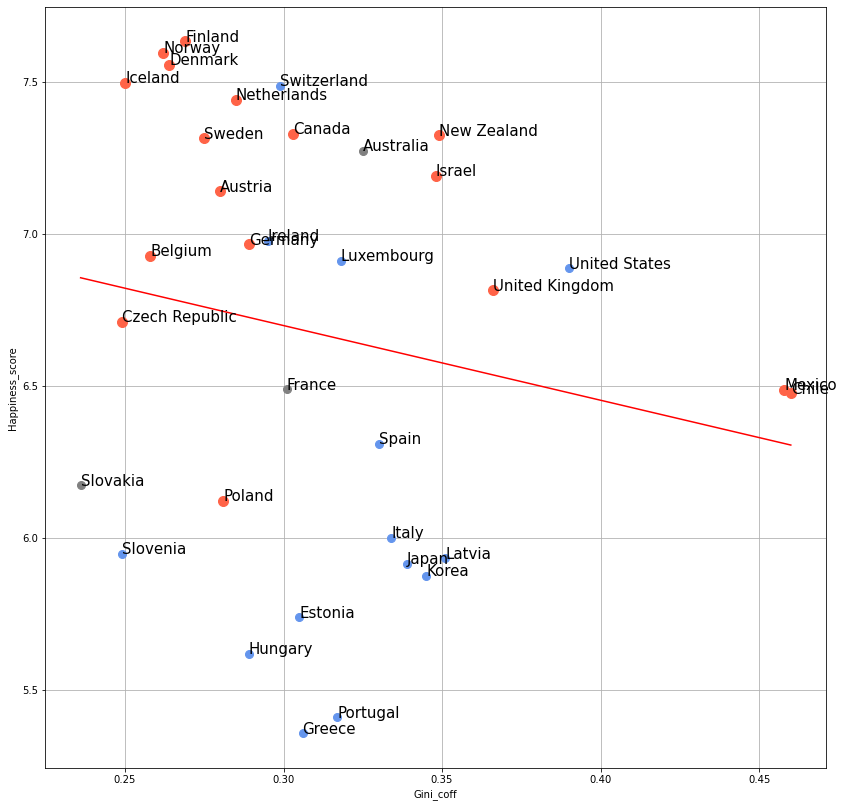

total_gini_corr : SpearmanrResult(correlation=-0.3060819106641892, pvalue=0.07831944276210083)

happy_gini_corr : SpearmanrResult(correlation=-0.40196078431372556, pvalue=0.10973047964744011)

unhappy_gini_corr : SpearmanrResult(correlation=0.03736263736263736, pvalue=0.899093096973967)


In [12]:
plt.figure(figsize=(14,14))

data='Gini_coff'

gini_data=Make_data(Data,data)
Make_name(gini_data,data)
Make_two_plt(gini_data,happy_data,unhappy_data,same_data,data)
Make_linear(gini_data,data)

plt.xlabel('Gini_coff')
plt.ylabel('Happiness_score')
plt.grid(True)
plt.show()

total_gini_body=pd.DataFrame({'Happiness_score':gini_data['Happiness_score'],'gini':gini_data[data]})
total_gini_corr=stats.spearmanr(total_gini_body.gini,total_gini_body.Happiness_score)
print('total_gini_corr : {}'.format(total_gini_corr))

happy_gini_body=pd.DataFrame({'Happiness_score':happy_data['Happiness_score'],'gini':happy_data[data]})
happy_gini_corr=stats.spearmanr(happy_gini_body.gini,happy_gini_body.Happiness_score)
print('\nhappy_gini_corr : {}'.format(happy_gini_corr))

unhappy_gini_body=pd.DataFrame({'Happiness_score':unhappy_data['Happiness_score'],'gini':unhappy_data[data]})
unhappy_gini_corr=stats.spearmanr(unhappy_gini_body.gini,unhappy_gini_body.Happiness_score)
print('\nunhappy_gini_corr : {}'.format(unhappy_gini_corr))

In [47]:
index_list=['PIR','House_price','Safety','Working/elder','Working_housrs','Employ_rate','Gini_coff']
total_corr=['0.24973255025764873','-0.0744193162723216','0.6050180452336893','-0.22872421695951106','-0.5473298205292999','0.5167698082161062','-0.3060819106641892']
total_pvalue=['0.1543321663724058','0.6757385493354546','0.00015037440982376978','0.19321668173397','0.000808073409247039','0.0017530689711709052','0.07831944276210083']

happy_corr=['0.04417181239175657','-0.05276077591237591','0.8220865084021362','0.33333333333333337','-0.6519607843137255','0.5000000000000001','-0.40196078431372556']
happy_pvalue=['0.8663207321493397','0.8406145356254658','0.00005140514476142','0.191057627345904','0.004568346266924807','0.040968955955836106','0.10973047964744011']

unhappy_corr=['0.37183740872507126','-0.015384615384615385','0.6563892574813541','-0.4945054945054946','-0.432967032967033','0.15164835164835166','0.03736263736263736']
unhappy_pvalue=['0.19049443095596738','0.9583697893719862','0.010783276452558773','0.07224967403413257','0.1220100059684802','0.6047905984521367','0.899093096973967']

bar_dict={'list':index_list,'total_corr':total_corr,'total_p':total_pvalue,'happy_corr':happy_corr,'happy_p':happy_pvalue,'unhappy_corr':unhappy_corr,'unhappy_p':unhappy_pvalue}

In [66]:
bar=pd.DataFrame(bar_dict, index=index_list,columns=['total_corr','total_p','happy_corr','happy_p','unhappy_corr','unhappy_p'])
bar

,total_corr,total_p,happy_corr,happy_p,unhappy_corr,unhappy_p
PIR,0.24973255025764873,0.1543321663724058,0.04417181239175657,0.8663207321493397,0.37183740872507126,0.19049443095596738
House_price,-0.0744193162723216,0.6757385493354546,-0.05276077591237591,0.8406145356254658,-0.015384615384615385,0.9583697893719862
Safety,0.6050180452336893,0.00015037440982376978,0.8220865084021362,0.00005140514476142,0.6563892574813541,0.010783276452558773
Working/elder,-0.22872421695951106,0.19321668173397,0.33333333333333337,0.191057627345904,-0.4945054945054946,0.07224967403413257
Working_housrs,-0.5473298205292999,0.000808073409247039,-0.6519607843137255,0.004568346266924807,-0.432967032967033,0.1220100059684802
Employ_rate,0.5167698082161062,0.0017530689711709052,0.5000000000000001,0.040968955955836106,0.15164835164835166,0.6047905984521367
Gini_coff,-0.3060819106641892,0.07831944276210083,-0.40196078431372556,0.10973047964744011,0.03736263736263736,0.899093096973967


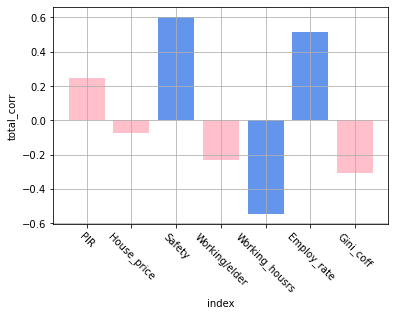

In [64]:
#plt.figure(figsize=(10,4))

for i in range(len(index_list)):
    if float(bar['total_p'][i])>0.05:
        plt.bar(bar.index[i],float(bar['total_corr'][i]),color='pink')
    else:
        plt.bar(bar.index[i],float(bar['total_corr'][i]),color='cornflowerblue')
        
plt.grid(True)
plt.xlabel('index')
plt.ylabel('total_corr')
plt.xticks(rotation = - 45 )
plt.show()

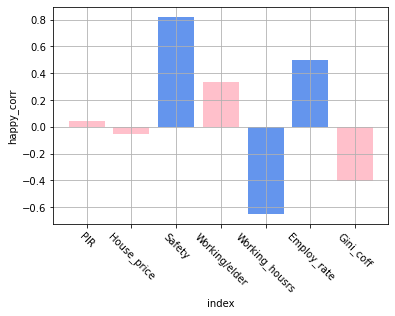

In [65]:
for i in range(len(index_list)):
    if float(bar['happy_p'][i])>0.05:
        plt.bar(bar.index[i],float(bar['happy_corr'][i]),color='pink')
    else:
        plt.bar(bar.index[i],float(bar['happy_corr'][i]),color='cornflowerblue')
        
plt.grid(True)
plt.xlabel('index')
plt.ylabel('happy_corr')
plt.xticks(rotation = - 45 )
plt.show()

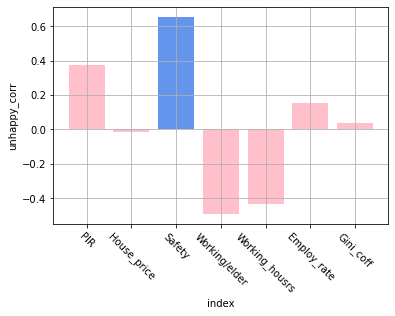

In [67]:
for i in range(len(index_list)):
    if float(bar['unhappy_p'][i])>0.05:
        plt.bar(bar.index[i],float(bar['unhappy_corr'][i]),color='pink')
    else:
        plt.bar(bar.index[i],float(bar['unhappy_corr'][i]),color='cornflowerblue')
        
plt.grid(True)
plt.xlabel('index')
plt.ylabel('unhappy_corr')
plt.xticks(rotation = - 45 )
plt.show()